> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset Project -- Divya

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

# Overview

I have selected the dataset that collects information from 100k medical appointments in Brazil and it is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

    ‘ScheduledDay’ tells us on what day the patient set up their appointment.
    
    ‘Neighborhood’ indicates the location of the hospital.
    
    ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    
# Analysis

### The goal of my analysis is to:

Calculate the percentage of patients that show/no show to their appointments

Produce a graph that shows the probability of patients that would show up based on their health condition

Explore a graph that shows the probability of patients that show up based on their gender

Lastly explore the graph of patients based on their "Handicap" condition

### I will demonstrate these goals through graphing and exploring the data.

### Conclusions and limitations of your analysis is based on my knowledge through these tutorials.


In [64]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

# Importing the required packages

import pandas as pd
import datetime
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [65]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

medicaldata = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
medicaldata.head(10)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [66]:
medicaldata.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574940e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263310e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542390e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969980e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635530e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775120e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [67]:
# check which columns have missing values with info()
medicaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [68]:
# check for duplicates in the data
sum(medicaldata.duplicated())

0

In [69]:
# Fixing the spelling mistakes for columns so it is easier to access later

medicaldata.rename(columns = {'Hipertension':'Hypertension',
                  'Handcap':'Handicap',
                  'No-show':'noshow'},inplace = True)
medicaldata.columns

# Also replacing the values for show/noshow
medicaldata['noshow'].replace("No", 1, inplace=True)
medicaldata['noshow'].replace("Yes", 0, inplace=True)

In [70]:
# Cleaning the date and time for ScheduledDay

medicaldata.ScheduledDay = medicaldata.ScheduledDay.apply(np.datetime64)
medicaldata.ScheduledDay.head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]

In [71]:
# Cleaning the date and time for AppointmentDay

medicaldata.AppointmentDay = medicaldata.AppointmentDay.apply(np.datetime64)
medicaldata.AppointmentDay.head()

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

In [72]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Check for any erroneous values in data

print('PatientId:',medicaldata.PatientId.unique())
print('AppointmentID:',medicaldata.AppointmentID.unique())
print('Gender:',medicaldata.Gender.unique())
print('ScheduledDay:',medicaldata.ScheduledDay.unique())
print('AppointmentDay:',medicaldata.AppointmentDay.unique())
print('Age:',medicaldata.Age.unique())
print('Neighbourhood:',medicaldata.Neighbourhood.unique())
print('Scholarship:',medicaldata.Scholarship.unique())
print('Hypertension:',medicaldata.Hypertension.unique())
print('Diabetes:',medicaldata.Diabetes.unique())
print('Alcoholism:',medicaldata.Alcoholism.unique())
print('Handicap:',medicaldata.Handicap.unique())
print('SMS_received:',medicaldata.SMS_received.unique())
print('noshow:',medicaldata.noshow.unique())

PatientId: [  2.98725000e+13   5.58998000e+14   4.26296000e+12 ...,   7.26331000e+13
   9.96998000e+14   1.55766000e+13]
AppointmentID: [5642903 5642503 5642549 ..., 5630692 5630323 5629448]
Gender: ['F' 'M']
ScheduledDay: ['2016-04-29T18:38:08.000000000' '2016-04-29T16:08:27.000000000'
 '2016-04-29T16:19:04.000000000' ..., '2016-04-27T16:03:52.000000000'
 '2016-04-27T15:09:23.000000000' '2016-04-27T13:30:56.000000000']
AppointmentDay: ['2016-04-29T00:00:00.000000000' '2016-05-03T00:00:00.000000000'
 '2016-05-10T00:00:00.000000000' '2016-05-17T00:00:00.000000000'
 '2016-05-24T00:00:00.000000000' '2016-05-31T00:00:00.000000000'
 '2016-05-02T00:00:00.000000000' '2016-05-30T00:00:00.000000000'
 '2016-05-16T00:00:00.000000000' '2016-05-04T00:00:00.000000000'
 '2016-05-19T00:00:00.000000000' '2016-05-12T00:00:00.000000000'
 '2016-05-06T00:00:00.000000000' '2016-05-20T00:00:00.000000000'
 '2016-05-05T00:00:00.000000000' '2016-05-13T00:00:00.000000000'
 '2016-05-09T00:00:00.000000000' '2016-0

In [73]:
# To get a general overview of the dataset
# Easily identify wrong values along the different columns. 

medicaldata.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [74]:
# We see that the condition "Handicap" also has erroneous data
# We will remove this and clean the data

medicaldata = medicaldata[(medicaldata.Handicap <= 0)]
print('Handicap:',medicaldata.Handicap.unique())

Handicap: [0]


In [75]:
# Since the ages are showing some non relalistic ages (For example: -1, 115) we focus from age 1 to 100

medicaldata = medicaldata[(medicaldata.Age >= 1) & (medicaldata.Age <= 100)]
print('Age:',sorted(medicaldata.Age.unique()))

Age: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


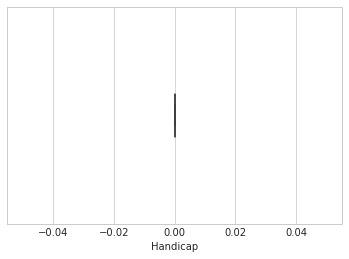

In [76]:
# Below is the box plot graph showing the distribution of handicap column.

sns.set_style("whitegrid")
sns.boxplot(x = medicaldata.Handicap, width=0.2, orient="h")

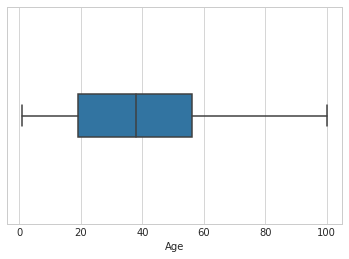

In [80]:
# Below is the box plot graph showing the distribution of Age column.

sns.set_style("whitegrid")
sns.boxplot(x = medicaldata.Age, width=0.2, orient="h")

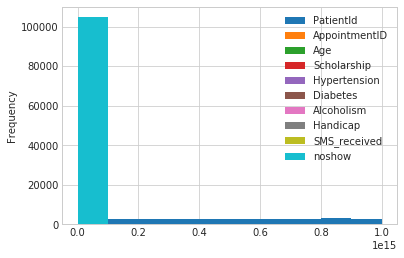

In [87]:
medicaldata.plot.hist('Gender')

## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Calculate the percentage of appointment show and noshows)


In [40]:
#Taking mean calculating percent of all patients present for appointment overall
appointmentshow = medicaldata["noshow"].mean()*100

#Simple maths, the abscent percent will be 100 - present percent
appointmentnoshow = 100 - appointmentshow


print("No of patients that show up ", round(appointmentshow,2) , "%")
print("No of patients that do not show up ", round(appointmentnoshow,2) , "%")

No of patients that show up  79.69 %
No of patients that do not show up  20.31 %


### Research Question 2  (Exploring the probability of patient showing up based on their condition)

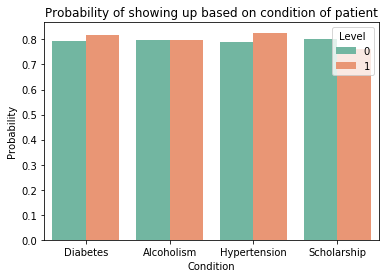

In [41]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# Exploring the probability of patient showing up based on their condition

def conditionprobability(group_by):
    rows = []
    for item in group_by:
        for level in medicaldata[item].unique():
            row = {'Condition': item}
            total = len(medicaldata[medicaldata[item] == level])
            n = len(medicaldata[(medicaldata[item] == level) & (medicaldata.noshow == 1)])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

sns.barplot(data = conditionprobability(['Diabetes', 'Alcoholism', 'Hypertension', 'Scholarship']),
                                         
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up based on condition of patient')
plt.ylabel('Probability')
plt.show()

### Research Question 3  (Exploring the probability of showing up based on the patient gender)

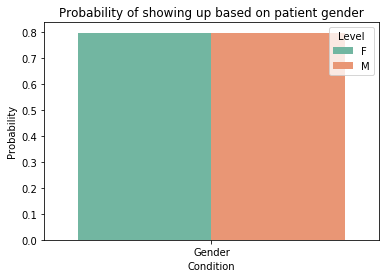

In [42]:
# Exploring the probability of showing up based on the patient gender

sns.barplot(data = conditionprobability(['Gender']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up based on patient gender')
plt.ylabel('Probability')
plt.show()

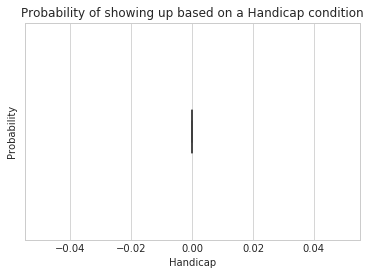

In [45]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# Exploring the probability of showing up based on Handicap condition
sns.set_style("whitegrid")
sns.boxplot(x = medicaldata.Handicap, width=0.2, orient="h")
#sns.set_style("whitegrid") sns.boxplot(x = medicaldata.Handicap, width=0.2, orient="h")
#sns.barplot(data = conditionprobability(['Handicap']),
#            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up based on a Handicap condition')
plt.ylabel('Probability')
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

In [18]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

# Conclusion
After completing the calculations we can see the percentages of patients that would show/no show are:

No of patients that show up  79.74 %

No of patients that do not show up  20.26 %

We also saw a graph that shows the probability of patients that would show up based on their health condition

The next graph showed the probability of patients that show up based on their gender

Then we explored the graph of patients based on their "Handicap" condition

Thus this was a good exercise that teaches us how to explore the data and look at it in different ways